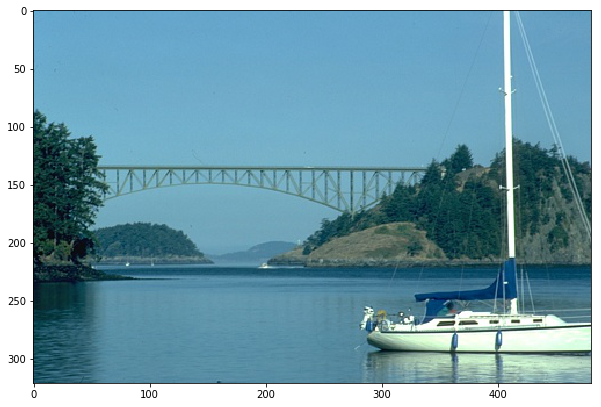

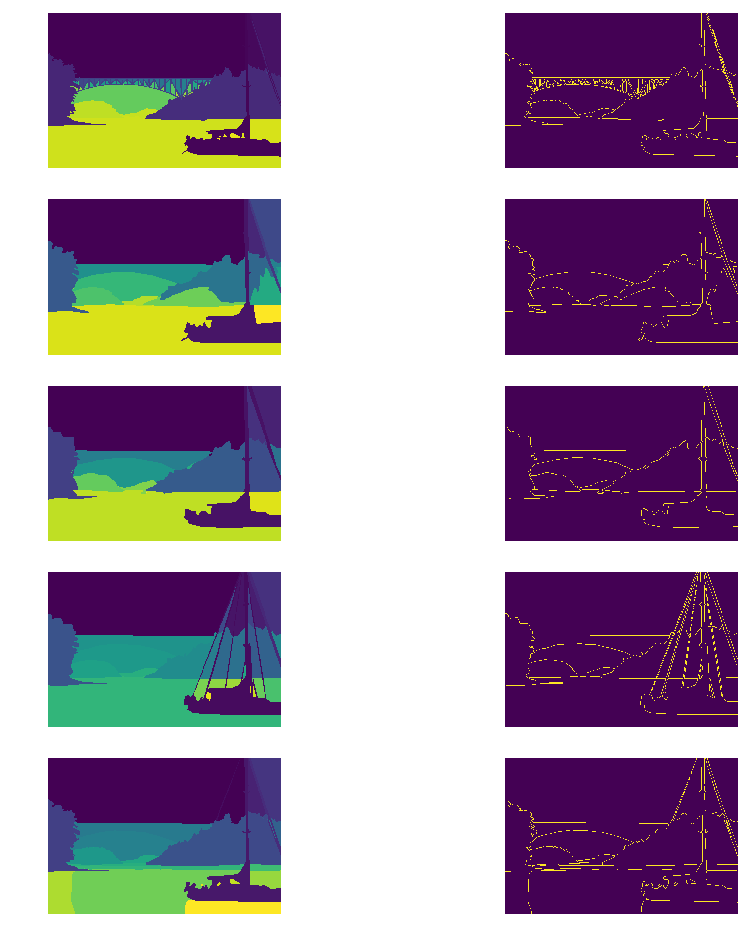

In [1]:
from scipy.io import loadmat
from PIL import Image
import numpy as np
import h5py 
from matplotlib import pyplot as plt
import matplotlib
from scipy.misc import toimage

from utils import *
from k_means import *
from image_segmentation import *
from metrics import *


%matplotlib inline

visualize_image('22090', 'train')

In [2]:
test_path = BERKELEY_IMG_DIR + FILE_SEPERATOR + 'test'
gt_path = BERKELEY_GT_DIR + FILE_SEPERATOR + 'test'


X, y = load_images('test')
# print(y.shape)
# print(X.shape)
# plt.imshow(y[0][0][:, :, 0])
    



images = segment_images(X)
print('>')
# print(images[0].shape)
# plt.imshow(y[0][0][:, :, 1], cmap='Greys_r') # boundries
# plt.imshow(y[0][0][:, :, 0])  # segmentation
# plt.figure()
# plt.axis('off')
# plt.imshow(y[0][0][:, :, 1]) # boundries

# f = f1_score_single(images[0], y[0][0][:, :, 0])
# print('f = {}'.format(f))

# ce = conditional_entropy(images[0], y[0][0][:, :, 0])
# print('conditional_entropy = {}'.format(ce))

# plt.figure()
# plt.imshow(y[0][4][:, :, 0])
# plt.figure()
# plt.imshow(y[0][0][:, :, 0])
for k in range(images.shape[1]):
#     plt.figure()
#     plt.imshow(images[0, k, :, :])
    print(" ==================== K = {} =================".format(k))
    avgs = evaluate_k_means_entropy(images[:, k, :, :], y)
    print("average = {} max = {} min = {}".format(np.average(avgs), np.max(avgs), np.min(avgs)))
    
#     print(" ==================== K = {} =================".format(k))
#     f = f1_score_all(images[:, k, :, :], y)
#     print(f)



# img = np.array(get_image('2092', 'train'))
# clusters, _ = segment(img)

# seg_image = clusters.reshape((img.shape[0], img.shape[1]))
# plt.imshow(seg_image)
# plt.axis('off')
# plt.savefig(f'./images/test.jpg')

# seg_image = np.rot90(seg_image, 2)
# seg_image = np.fliplr(seg_image)
# xx = np.arange(img.shape[0])
# yy = np.arange(img.shape[1])
# X, Y = np.meshgrid(yy, xx)

# fig = plt.figure()
# h = plt.contourf(X, Y, seg_image)
# plt.axis('off')
# plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
# plt.savefig(f'./Images/{i}_{k}.jpg')


(3,)
(3, 481, 321, 3)
(3, 5, 481, 321)
>
 ==================== K = 0 =================
average = 0.02910756333639027 max = 0.03334462942923684 min = 0.02486623701399715
 ==================== K = 1 =================
average = 0.048259958247103 max = 0.05566368466190923 min = 0.0428157161945295
 ==================== K = 2 =================
average = 0.06577156039480013 max = 0.0759017162630596 min = 0.05763198490366526
 ==================== K = 3 =================
average = 0.08433909254255734 max = 0.09413514043992308 min = 0.0728590168894479
 ==================== K = 4 =================
average = 0.09947789132499867 max = 0.11174256272746652 min = 0.09101767196984083


/anaconda3/lib/python3.6/site-packages/sklearn/manifold/spectral_embedding_.py:234: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


[[2 2 2 ..., 5 1 6]
 [2 2 2 ..., 5 5 1]
 [2 2 2 ..., 5 5 1]
 ..., 
 [6 6 6 ..., 6 6 6]
 [6 6 6 ..., 6 6 6]
 [6 6 6 ..., 6 6 6]]
clustered image 0
[[ 5  5  5 ...,  5  5  6]
 [ 5  5  5 ...,  5  6  6]
 [ 3  5  5 ...,  5  6  6]
 ..., 
 [10 10 10 ..., 10 10  8]
 [10 10 10 ..., 10 10  8]
 [10 10 10 ...,  8  8  8]]
clustered image 1
[[7 7 7 ..., 2 2 2]
 [7 7 7 ..., 2 2 2]
 [7 7 7 ..., 2 2 2]
 ..., 
 [4 4 4 ..., 4 4 4]
 [4 4 4 ..., 4 4 4]
 [4 4 4 ..., 4 4 4]]
clustered image 2


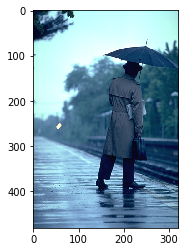

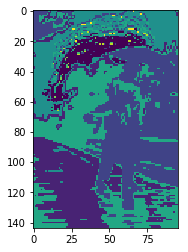

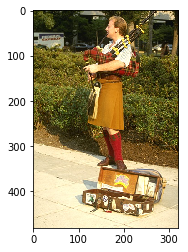

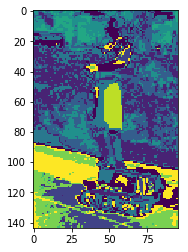

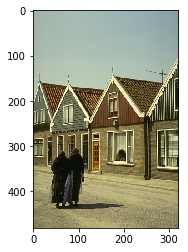

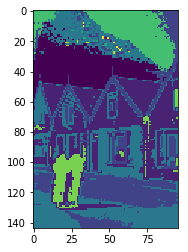

In [3]:
clustered_images = []
for i in range(X.shape[0]):
    res = spectral_segment(X[i])
    print(res)
    plt.figure()
    plt.imshow(X[i])
    plt.figure()
    plt.imshow(res)
    clustered_images.append(res)
#     with open(f'./images/spectral_labels_{i}.pkl', 'wb+') as f:
#         pickle.dump(clustered_images[-1], f)
    print(f'clustered image {i}')